In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MultipleLocator
import Common_Functions as cmn

In [2]:
training_data = cmn.get_training_data()
training_data = cmn.clean_data(training_data)
training_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [3]:
columns_has_null = training_data.isna().sum().sort_values(ascending=False)
columns_has_null[columns_has_null > 0]

Series([], dtype: int64)

In [4]:
X_train = training_data.iloc[:, :-1]
y_train = training_data.iloc[:, -1:]
display(X_train, y_train)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010


,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000
...,...
1456,175000
1457,210000
1458,266500


In [5]:
forest = RandomForestRegressor()
forest.fit(X_train, np.ravel(y_train))

RandomForestRegressor()

In [6]:
print("model score on training data:", forest.score(X_train, y_train))

model score on training data: 0.9808541043308721


# Testing training data on the training dataset with a 0.75 to 0.25 ratio training data - testing data

In [7]:
X = training_data.iloc[:, :-1]
y = training_data.iloc[:, -1:]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, train_size=0.75)
display(X_train, y_train)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,636,255,57,0,0,0,0,0,8,2007
808,70,144.0,21384,5,6,1923,2004,0.0,1309,0,...,528,0,312,0,0,0,0,0,5,2009
956,90,82.0,7136,6,6,1946,1950,423.0,484,0,...,492,0,0,0,0,0,0,0,8,2007
1041,20,88.0,13125,5,4,1957,2000,67.0,168,682,...,484,0,0,0,0,0,0,0,1,2006
702,20,80.0,9600,7,5,1969,1969,168.0,0,0,...,528,0,0,0,0,0,0,0,7,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,20,78.0,10140,6,5,1974,1974,174.0,0,0,...,478,0,0,0,0,0,0,0,8,2009
906,20,80.0,9920,5,5,1954,1954,110.0,354,290,...,280,0,0,164,0,0,0,0,2,2010
1097,70,60.0,6882,6,7,1914,2006,0.0,0,0,...,0,136,0,115,0,0,0,0,3,2007


,SalePrice
Id,
7,307000
808,223500
956,145000
1041,155000
702,140000
...,...
716,165000
906,128000
1097,127000


In [9]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

C:\Users\Alexander\AppData\Local\Temp\ipykernel_21772\3799881120.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor()

In [10]:
print("model score on training data:", forest.score(X_train, y_train))
print("model score on test data:", forest.score(X_test, y_test))

model score on training data: 0.9754347752318487
model score on test data: 0.9067399528983416


In [11]:
sns.set_context("paper")
sns.set_style("ticks")

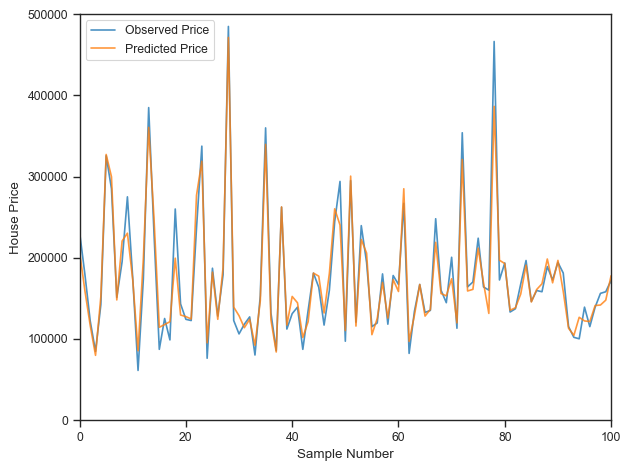

In [12]:
cmn.plot_observed_vs_predicted(observed=y_test.to_numpy(), predicted=forest.predict(X_test))

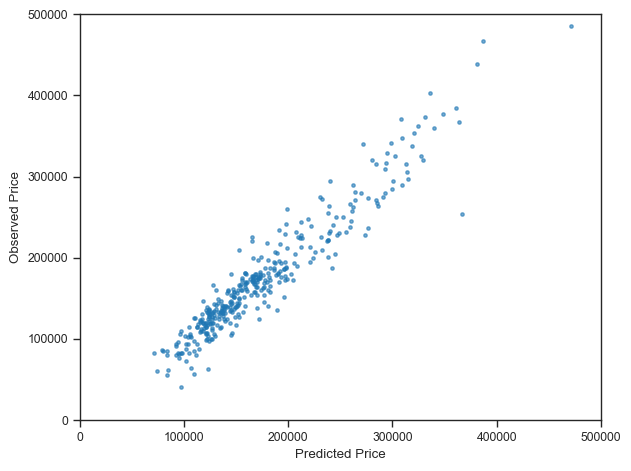

In [13]:
cmn.plot_single_scatter(observed=y_test.to_numpy(), predicted=forest.predict(X_test))

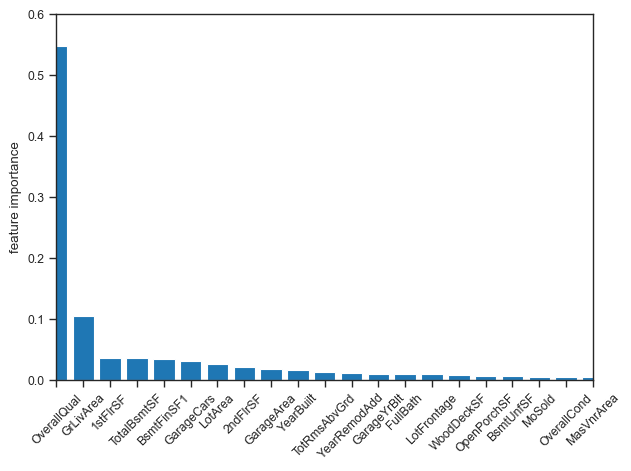

In [14]:
cmn.plot_feature_importance(x_val=X_train, forest=forest)

# Export new csv's without strings, based on decision

In [15]:
training_data = cmn.get_training_data()
training_data = cmn.clean_data(training_data)
training_data.to_csv("house-prices-advanced-regression-techniques/stringless_train.csv")
training_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [16]:
testing_data = cmn.get_testing_data()
testing_data = cmn.clean_data(testing_data)
testing_data.to_csv("house-prices-advanced-regression-techniques/stringless_test.csv")
testing_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
